<a href="https://colab.research.google.com/github/yenvihocdata/Clustering-Customer/blob/main/DAZONE_TEAM_MEOW_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**I/ Overview**

#####**1. Introduction**

**Customer Persona analysis** is the process of using data and information to better understand customers, including preferences, purchasing behavior, demographic characteristics, etc. The purpose is to help businesses have an understanding of different customer groups to develop products and services that better meet their needs and desires, launch more effective marketing campaigns, and attract the right potential customers


#####**2. Dataset Features**


**People:**

`ID`: Customer's unique identifier

`Year_Birth`: Customer's birth year

`Gender`: Customer's gender

`Phone_Number`: Customer's phone number

`Phone`: Customer's phone number

`Payment_Method`: Most common form of payment

`Academic_Level`: Customer's educational level

`Living_With`: Marital status and number of children in the house

`Income`: Customer's annual income

`Registration_Time`: The time the customer registered with the company

`Year_Register`: Year of membership card registration

`Month_Register`: Month of membership card registration

`Recency`: Number of days since the customer's last purchase

`Complain`: 1 if the customer complained in the last 2 years, 0 otherwise


**Products:**

`Liquor`: Amount spent on wine in last 2 years

`Vegetables`: Amount spent on vegetables in last 2 years

`Pork`: Amount spent on pork in last 2 years

`Seafood`: Amount spent on fish in last 2 years

`Candy`: Amount spent on sweets in last 2 years

`Jewellery`: Amount spent on jewellery in last 2 years


**Promotion:**

`Num_Deals_Purchases`: Number of purchases made with a discount

`Promo_10`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

`Promo_20`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

`Promo_30`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

`Promo_40`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

`Promo_50`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


**Place:**

`Num_Web_Purchases`: Number of purchases made through the company’s website

`Num_Catalog_Purchases`: Number of purchases made using a catalogue

`Num_Store_Purchases`: Number of purchases made directly in stores

`Num_Web_Visits_Month`: Number of visits to company’s website in the last month

`Total_Purchase`: Total number of company purchases

#####**3. Data Overview**

In [717]:
#Importing the Libraries
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import missingno as msno
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [718]:
# Import dataset

# URL tải xuống trực tiếp
file_url = 'https://drive.google.com/uc?export=download&id=1_y7RCkkWUiCRRCGmAPzlX8-7QDmIx5Uy'

# Tải tệp xuống
response = requests.get(file_url)
with open('/content/my_dataset.csv', 'wb') as file:
    file.write(response.content)

# Đọc tệp CSV vào DataFrame
df = pd.read_csv('/content/my_dataset.csv')

# Hiển thị một vài dòng đầu tiên của DataFrame
print(df.head())


     ID  Year_Of_Birth Academic_Level   Income Registration_Time  Recency  \
0  6815         1982.0            PhD  30396.0        30-04-2023     22.0   
1  2567            NaN            NaN  83532.0        26-09-2022     36.0   
2  6053         1982.0            PhD  68682.0        06-10-2022     56.0   
3  1985         2002.0            PhD  63516.0        06-07-2022     30.0   
4  6860            NaN            PhD  51650.0        11-05-2023      NaN   

   Liquor  Vegetables   Pork  Seafood  ...  Promo_20  Complain  Gender  \
0    16.0         2.0    6.0      0.0  ...       0.0       0.0    Male   
1   756.0         NaN  562.0      NaN  ...       0.0       0.0   Other   
2   920.0         2.0  505.0     99.0  ...       0.0       0.0    Male   
3   142.0        13.0  114.0     15.0  ...       0.0       0.0  Female   
4   153.0         5.0   22.0      2.0  ...       0.0       0.0     NaN   

          Phone  Phone_Number  Year_Register  Month_Register  Total_Purchase  \
0           

In [719]:
#Concise summary of the DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

(3069, 31)

*Comments*
- The data set has 3069 records(rows), with ID as the uique indentifier for each customer, and 31 columns
- Most of the numeric fields are float64 type
- Many columns need to be converted to appropriate data types.

In [720]:
# Number of null in each field
df.isnull().sum()

ID                          0
Year_Of_Birth             237
Academic_Level            270
Income                    287
Registration_Time         245
Recency                   265
Liquor                    262
Vegetables                259
Pork                      263
Seafood                   256
Candy                     229
Jewellery                 277
Num_Deals_Purchases       228
Num_Web_Purchases         246
Num_Catalog_Purchases     258
Num_Store_Purchases       243
Num_Web_Visits_Month      270
Promo_30                  243
Promo_40                  254
Promo_50                  268
Promo_10                  235
Promo_20                  243
Complain                  256
Gender                    275
Phone                    1508
Phone_Number             1812
Year_Register             985
Month_Register            969
Total_Purchase            236
Living_With               248
Payment_Method            799
dtype: int64

<Axes: >

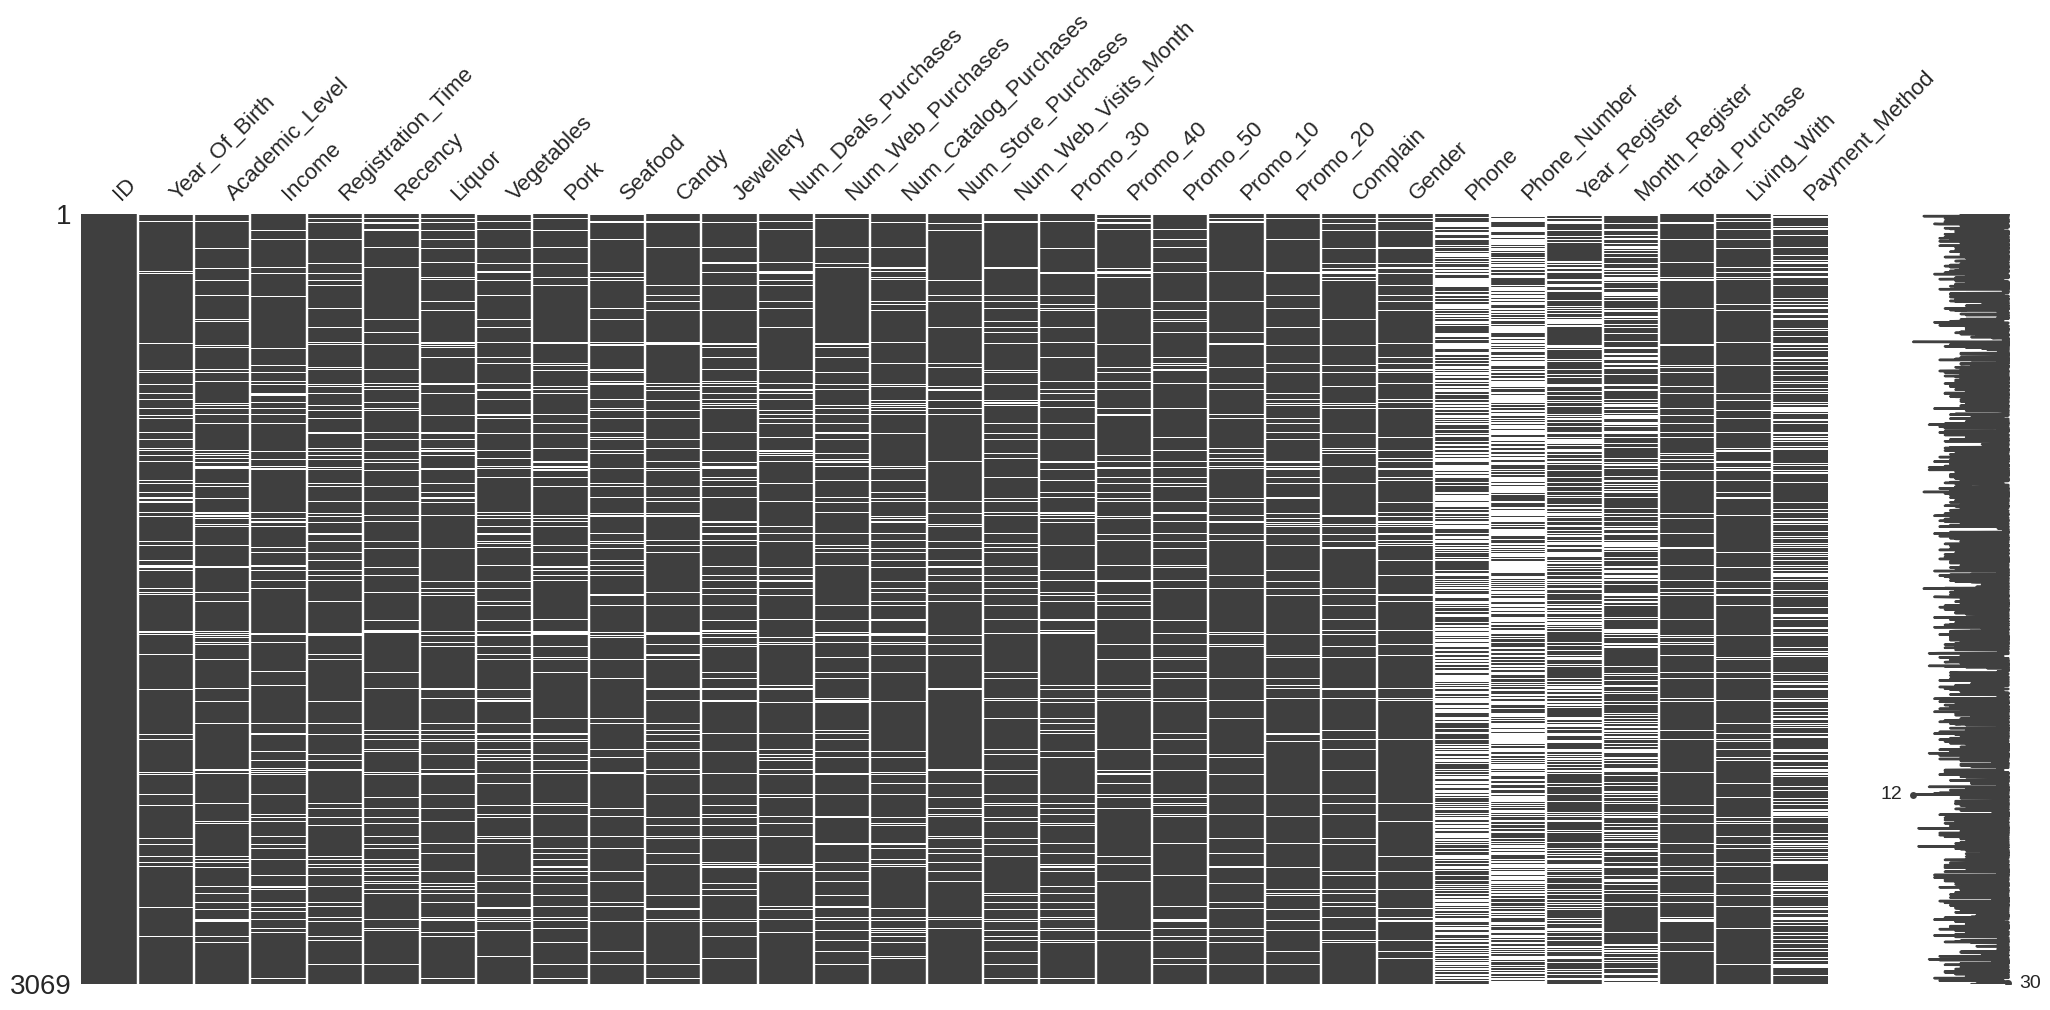

In [721]:
msno.matrix(df)

*Comments*:
>- Most columns have missing values, ranging from a few hundred to over a thousand.
- `Phone`,`Phone_Number`, `Year_Register`, `Month_register` and `Registration_Time`, `Payment_Method`, `Recency`, `Gender` have a significant number of missing values and they are not vital for the analysis **-> can remove the columns**
- Missing values in key columns like `Income`, `Year_Of_Birth`, `Academic_Level`,`Living_With` could impact the analysis **-> remove these missing values rows**

In [722]:
#check for duplicates
df.duplicated().sum()

0

*Comments*
- There is no duplicated values


###**II/ Data Processing**
>

#####**1. Data Cleaning**

In [723]:
#Remove null for Income, Year_Of_Birth, Payment_Method
df = df.dropna(subset=['Income', 'Year_Of_Birth','Academic_Level','Living_With'])

In [724]:
# Remove columns that are unecessary
df = df.drop(columns=['Phone', 'Phone_Number', 'Month_Register', 'Year_Register','Registration_Time', 'ID', 'Payment_Method', 'Recency', 'Gender'])

In [725]:
# Replace negative values
df['Promo_40'] = df['Promo_40'].abs()

In [726]:
# Convert float columns to integers
float_columns = [ 'Year_Of_Birth', 'Liquor', 'Vegetables', 'Pork', 'Seafood',
                 'Candy', 'Jewellery', 'Promo_10', 'Promo_20',
                 'Promo_30', 'Promo_40', 'Promo_50', 'Num_Deals_Purchases',
                 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases',
                 'Total_Purchase', 'Num_Web_Visits_Month', 'Complain']
df[float_columns] = df[float_columns].astype('Int64')

In [727]:
# Filling Missing Values with 0
columns=['Promo_10','Promo_20','Promo_30','Promo_40','Promo_50','Num_Deals_Purchases','Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases','Num_Web_Visits_Month','Complain','Total_Purchase']
for column in columns:
    df[column].fillna(0, inplace=True)

# Create feature to sum new the Total Purchase
df['Total_Purchase2']=df['Num_Deals_Purchases']+df['Num_Web_Purchases']+df['Num_Catalog_Purchases']+df['Num_Store_Purchases']

# Create feature to take the correct number of Total Purchase and fill in missing values
df['Total_Purchases'] = np.maximum(df['Total_Purchase'], df['Total_Purchase2'])

# Drop 'Total_Purchase' and 'Total_Purchase2'
if 'Total_Purchase' in df.columns and 'Total_Purchase2' in df.columns:
    df.drop(columns=['Total_Purchase', 'Total_Purchase2'], inplace=True)


In [728]:
#Fill missing values with median
columns = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']
for column in columns:
    median = df[column].median()
    if pd.api.types.is_integer_dtype(df[column]):
        df[column].fillna(int(median), inplace=True)  # Convert median to int for integer columns
    else:
        df[column].fillna(median, inplace=True)  # Use median as is for non-integer columns


#####**2.Exploring the categorical features**


In [729]:
# Change Year_Of_Birth into Age
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Of_Birth']
if 'Year_Of_Birth' in df.columns:
    df.drop(columns=['Year_Of_Birth'], inplace=True)

In [730]:
# Map academic levels to groups
academic_level_map = {
    'PhD': 'Doctorate',
    'Graduation': 'Bachelor',
    'Master': 'Master',
    '2n Cycle': 'Bachelor',
    'Basic': 'Basic',
    None: 'Unknown'  # Handle missing values
}

df['Education'] = df['Academic_Level'].map(academic_level_map)

# Remove the Living_With column
if 'Academic_Level' in df.columns:
    df.drop(columns=['Academic_Level'], inplace=True)

In [731]:
# Create feature indicating total amount spent by the customer in various categories
categories = ['Liquor', 'Vegetables', 'Pork', 'Seafood', 'Candy', 'Jewellery']
df['Total_Spending'] = df[categories].sum(axis=1)

In [732]:
# Split Living_With column into Marital_Status and Children
df[['Marital_Status', 'Children']] = df['Living_With'].str.split('_', expand=True)

# Convert 'Children' column to numeric values
df['Children'] = pd.to_numeric(df['Children'], errors='coerce').astype('Int64')

# Replace values in Marital_Status column
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone',
    'Divorced': 'Alone',
    'Single': 'Alone',
    None: 'Unknown'  # Handle missing values
})

# Remove the Living_With column
if 'Living_With' in df.columns:
   df.drop(columns=['Living_With'], inplace=True)



In [733]:
# Create a mapping for marital status
marital_status_mapping = {'Alone': 1, 'Partner': 2}
df['Marital_Status_Int'] = df['Marital_Status'].map(marital_status_mapping)

# Fill missing values in 'Marital_Status_Int' and 'Children' with 0
df['Marital_Status_Int'].fillna(0, inplace=True)
df['Children'].fillna(0, inplace=True)

# Creating feature indicating "Family_Size"
df['Family_Size'] = df['Marital_Status_Int'] + df['Children']

# Fill missing values in 'Marital_Status_Int' and 'Children' with 0
df['Marital_Status_Int'].fillna(0, inplace=True)
df['Children'].fillna(0, inplace=True)

# Convert 'Family_Size' to int64
df['Family_Size'] = df['Family_Size'].astype('int64')
# Remove the Marital_Status_Int column
if 'Marital_Status_Int' in df.columns:
    df.drop(columns=['Marital_Status_Int'], inplace=True)


In [734]:
# Define the new order of the columns
column_order = ['Age', 'Education', 'Income', 'Marital_Status', 'Children',
                'Family_Size', 'Liquor', 'Vegetables', 'Pork','Seafood','Candy',
                'Jewellery','Total_Spending', 'Promo_10','Promo_20',
                'Promo_30','Promo_40','Promo_50','Num_Deals_Purchases',
                'Num_Web_Purchases','Num_Catalog_Purchases','Num_Store_Purchases',
                'Total_Purchases', 'Num_Web_Visits_Month',
                'Complain']

# Reorder the columns
df = df[column_order]

In [735]:
# Review the data after processing
df.isnull().sum()

Age                      0
Education                0
Income                   0
Marital_Status           0
Children                 0
Family_Size              0
Liquor                   0
Vegetables               0
Pork                     0
Seafood                  0
Candy                    0
Jewellery                0
Total_Spending           0
Promo_10                 0
Promo_20                 0
Promo_30                 0
Promo_40                 0
Promo_50                 0
Num_Deals_Purchases      0
Num_Web_Purchases        0
Num_Catalog_Purchases    0
Num_Store_Purchases      0
Total_Purchases          0
Num_Web_Visits_Month     0
Complain                 0
dtype: int64

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2406 entries, 0 to 3067
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2406 non-null   Int64  
 1   Education              2406 non-null   object 
 2   Income                 2406 non-null   float64
 3   Marital_Status         2406 non-null   object 
 4   Children               2406 non-null   Int64  
 5   Family_Size            2406 non-null   int64  
 6   Liquor                 2406 non-null   Int64  
 7   Vegetables             2406 non-null   Int64  
 8   Pork                   2406 non-null   Int64  
 9   Seafood                2406 non-null   Int64  
 10  Candy                  2406 non-null   Int64  
 11  Jewellery              2406 non-null   Int64  
 12  Total_Spending         2406 non-null   int64  
 13  Promo_10               2406 non-null   Int64  
 14  Promo_20               2406 non-null   Int64  
 15  Promo_30 

*Comments*
- All of the missing values have been dealed with
- Some data types have been changed to fit with the analysis
- Create new columns which is convenient for the analysis and remove the unnessary ones

#####**3.Outlier Detection**

In [737]:
# Descriptive statistics of the DataFrame
df.describe()

,Age,Income,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
count,2406.0,2406.000000,2406.0,2406.000000,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0,...,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0,2406.0
mean,36.117623,52300.468412,0.947631,2.592269,303.323358,27.790108,163.236076,36.809643,26.399834,43.524106,...,0.072319,0.680798,0.014131,2.258936,3.994181,2.605569,5.652951,14.741064,5.150457,0.009144
std,4.93794,24906.195103,0.747943,0.902069,333.571969,39.382695,220.473763,53.915398,40.47112,51.509949,...,0.25907,0.466264,0.118057,1.907822,2.798865,2.912064,3.332397,7.686467,2.558873,0.095205
min,22.0,1730.000000,0.0,1.000000,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,33.0,35651.250000,0.0,2.000000,27.0,4.0,16.0,3.0,1.0,9.0,...,0.0,0.0,0.0,1.0,2.0,0.0,3.0,7.0,3.0,0.0
50%,36.0,51411.500000,1.0,3.000000,176.0,10.0,68.0,12.0,8.0,24.0,...,0.0,1.0,0.0,2.0,3.0,2.0,5.0,15.0,6.0,0.0
75%,39.0,68307.250000,1.0,3.000000,494.0,33.0,220.5,47.0,32.0,54.0,...,0.0,1.0,0.0,3.0,6.0,4.0,8.0,21.0,7.0,0.0
max,49.0,666666.000000,3.0,5.000000,1494.0,201.0,1725.0,259.0,262.0,321.0,...,1.0,1.0,1.0,15.0,27.0,28.0,13.0,44.0,20.0,1.0


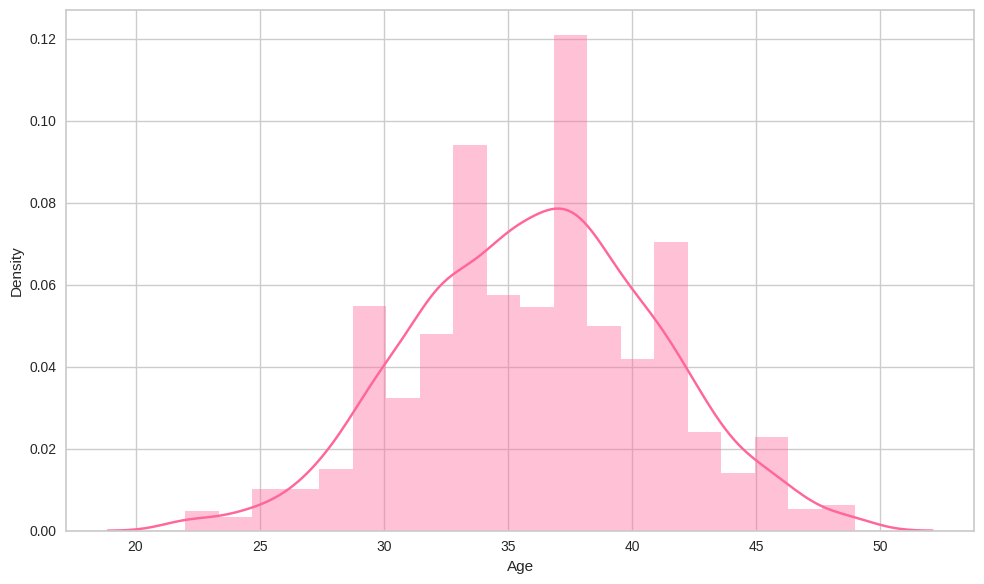

In [738]:
# Create histogram for 'Age'
plt.figure(figsize=(10,6))
sns.distplot(df.Age,bins=20, color='#FF6699')
plt.tight_layout()

<Axes: xlabel='Income', ylabel='Density'>

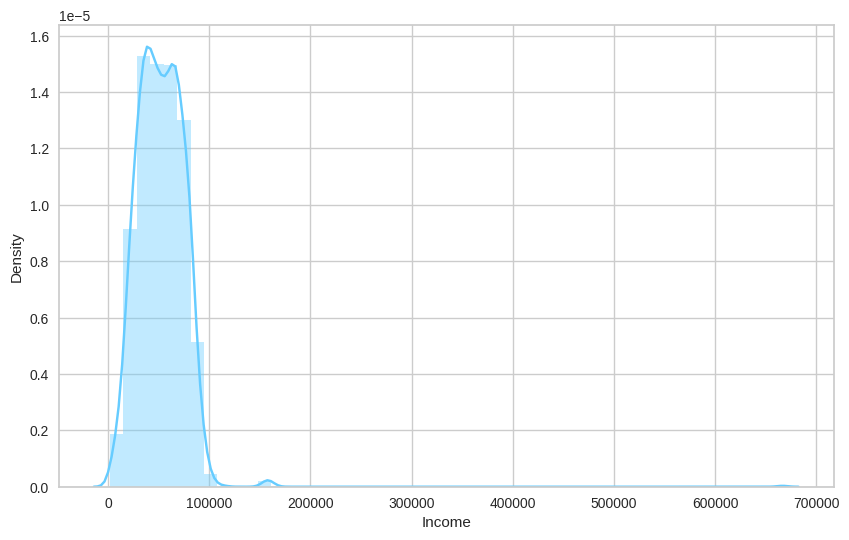

In [739]:
# Create histogram for 'Income'
plt.figure(figsize=(10,6))
sns.distplot(df.Income, color='#66CCFF')

<Axes: xlabel='Total_Spending', ylabel='Density'>

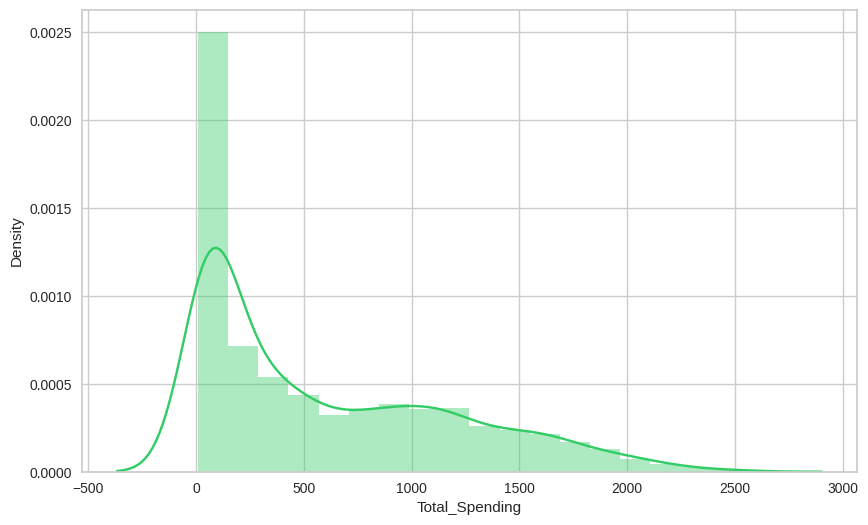

In [740]:
# Create histogram for 'Total_Spending'
plt.figure(figsize=(10,6))
sns.distplot(df.Total_Spending, color='#33CC66')

In [741]:
# Create Box Plot Visualization
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df['Age'], notched=True, name='Age', marker_color='#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=2)

fig.add_trace(go.Box(y=df['Income'], notched=True, name='Income', marker_color='#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=1)

fig.add_trace(go.Box(y=df['Total_Spending'], notched=True, name='Total_Spending', marker_color='lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), row=1, col=3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()

In [742]:
# Calculate the IQR for each numerical column
Q1 = df[['Age', 'Total_Spending', 'Income']].quantile(0.25)
Q3 = df[['Age', 'Total_Spending', 'Income']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each numerical column
outliers_age = df[(df['Age'] < lower_bound['Age']) | (df['Age'] > upper_bound['Age'])]
outliers_spending = df[(df['Total_Spending'] < lower_bound['Total_Spending']) | (df['Total_Spending'] > upper_bound['Total_Spending'])]
outliers_income = df[(df['Income'] < lower_bound['Income']) | (df['Income'] > upper_bound['Income'])]

# Combine outlier indices
outlier_indices = outliers_age.index.union(outliers_spending.index).union(outliers_income.index)

# Remove rows containing outliers
df_cleaned = df.drop(index=outlier_indices)

# Print the number of removed outliers
print("Number of removed outliers:", len(outlier_indices))

Number of removed outliers: 41


In [743]:
# Descriptive statistics of the Cleaned DataFrame
df_cleaned.describe()

,Age,Income,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
count,2365.0,2365.000000,2365.0,2365.000000,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0,...,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0,2365.0
mean,36.148837,51590.740381,0.94926,2.591543,302.584778,27.759408,160.390698,36.849894,26.393658,43.717125,...,0.072304,0.67907,0.013953,2.257928,4.007188,2.572939,5.663425,14.731501,5.175476,0.008457
std,4.754177,20672.720709,0.746654,0.900139,331.568395,39.335675,212.650975,54.014512,40.461323,51.656158,...,0.259046,0.466933,0.117323,1.876999,2.802501,2.788108,3.329995,7.64622,2.551515,0.09159
min,24.0,1730.000000,0.0,1.000000,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,33.0,35340.000000,0.0,2.000000,26.0,4.0,16.0,3.0,1.0,9.0,...,0.0,0.0,0.0,1.0,2.0,0.0,3.0,7.0,3.0,0.0
50%,36.0,51287.000000,1.0,3.000000,176.0,10.0,68.0,12.0,8.0,24.0,...,0.0,1.0,0.0,2.0,3.0,2.0,5.0,15.0,6.0,0.0
75%,39.0,68117.000000,1.0,3.000000,494.0,33.0,218.0,47.0,32.0,55.0,...,0.0,1.0,0.0,3.0,6.0,4.0,8.0,21.0,7.0,0.0
max,48.0,113734.000000,3.0,5.000000,1494.0,201.0,1725.0,259.0,262.0,321.0,...,1.0,1.0,1.0,15.0,27.0,28.0,13.0,43.0,20.0,1.0


In [744]:
df_cleaned

,Age,Education,Income,Marital_Status,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
0,42,Doctorate,30396.0,Partner,1,3,16,2,6,0,...,1,1,0,2,1,1,2,6,7,0
2,42,Doctorate,68682.0,Partner,0,2,920,2,505,99,...,0,1,0,1,4,9,10,24,2,0
5,42,Bachelor,44931.0,Partner,1,3,79,2,11,0,...,0,0,0,1,2,1,3,7,5,0
6,30,Bachelor,72679.0,Alone,1,2,620,56,260,127,...,0,1,0,1,4,7,5,17,1,0
7,37,Doctorate,66334.0,Partner,1,3,910,13,218,0,...,0,1,0,2,9,3,5,19,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,38,Bachelor,92955.0,Partner,0,2,694,23,925,31,...,0,0,0,1,6,7,9,23,2,0
3064,34,Basic,20425.0,Partner,1,3,5,14,5,3,...,0,1,0,2,2,0,3,7,7,0
3065,34,Doctorate,65295.0,Alone,0,1,366,34,117,34,...,0,1,0,1,3,3,13,20,2,0
3066,26,Bachelor,31632.0,Alone,0,1,18,10,12,11,...,0,1,0,1,2,1,2,6,7,0


*Comments*
- With 41 ouliers detected and removed, the final Dataset has 2365 records and 25 columns
- The Dataset is ready to be analyzed

###**III/Data exploring(EDA)**

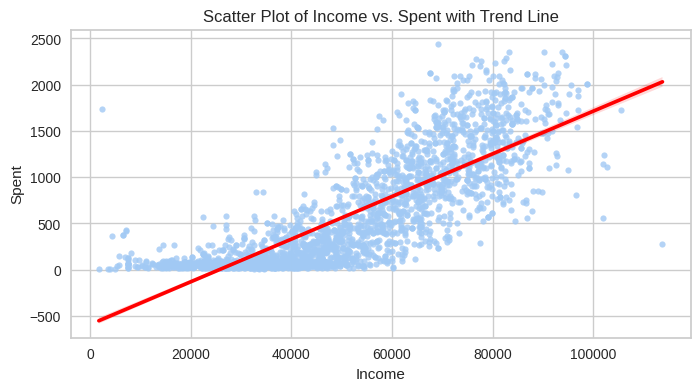

,Income,Total_Spending
Income,1.000000,0.663348
Total_Spending,0.663348,1.000000


In [745]:
# Create the scatter plot with a regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Total_Spending', data=df_cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()
df[['Income', 'Total_Spending']].corr()

*Comment*
- There is a positive correlation between income and spending. This means that as income increases, spending also tends to increase.
- The slope of the trend line is not very steep. This suggests that while there is a positive correlation, increases in income are not associated with dramatic increases in spending.

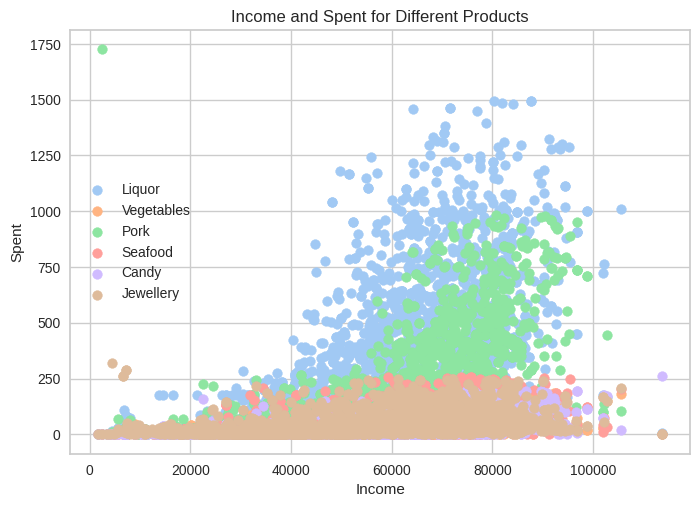

In [746]:
# Create a scatter plot for each product type
plt.scatter(df_cleaned['Income'], df_cleaned.Liquor, label="Liquor")
plt.scatter(df_cleaned['Income'], df_cleaned.Vegetables, label="Vegetables")
plt.scatter(df_cleaned['Income'], df_cleaned.Pork, label="Pork")
plt.scatter(df_cleaned['Income'], df_cleaned.Seafood, label="Seafood")
plt.scatter(df_cleaned['Income'], df_cleaned.Candy, label="Candy")
plt.scatter(df_cleaned['Income'], df_cleaned.Jewellery, label="Jewellery")

# Add legends, titles, and labels to axes
plt.legend()
plt.title("Income and Spent for Different Products")
plt.xlabel("Income")
plt.ylabel("Spent")

# Show chart
plt.show()

*Comment*
- People with higher incomes tend to spend more on all products compared to those with lower incomes
- There might be a stronger correlation between income and spending on products like Liqour, Pork compared to others **-> people tend to spend more on Treat or Indulgent Goods when they have high income**
- Even at higher income levels, spendings on some products like Vegetables, Seafood, Candy, Jewellery are the same. **-> people have a fixed budget for certain essential goods**

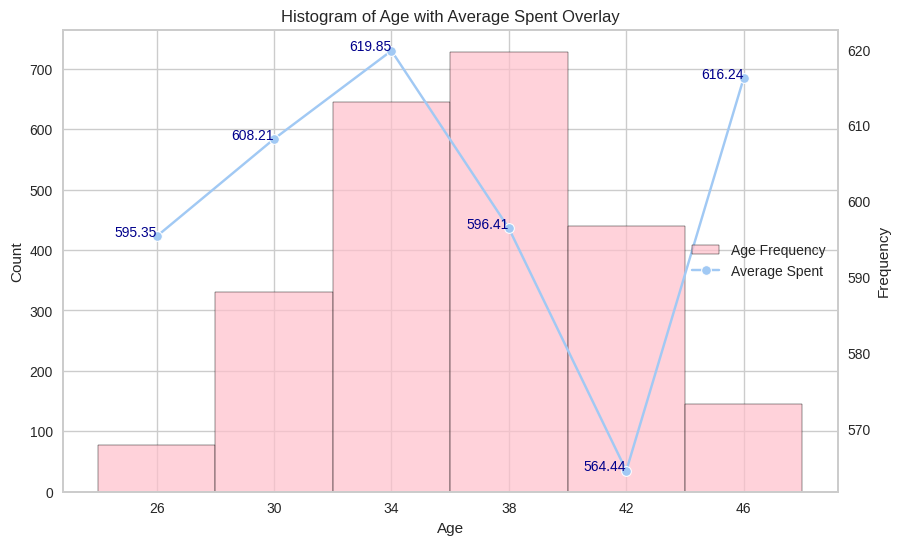

In [747]:
# Create bins for the 'Age' column
bins = np.arange(df_cleaned['Age'].min(), df_cleaned['Age'].max() + 4, 4)  # Adjust the bin width as necessary
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers

df['Age_bins'] = pd.cut(df['Age'], bins=bins, include_lowest=True)
plt.figure(figsize=(10, 6))
# Group by the bins and calculate the mean of 'Spent'
grouped = df.groupby(pd.cut(df['Age'], bins=bins, labels=bin_centers))['Total_Spending'].mean().reset_index()
grouped.columns = ['Age_bins', 'Total_Spending']

# Plotting
ax = sns.histplot(data=df_cleaned, x='Age', bins=bins, kde=False, stat='count', color='pink', alpha=0.7, label='Age Frequency')
ax.set_xticks(bin_centers)
ax.set_xticklabels([f'{int(center)}' for center in bin_centers])

# Create a secondary y-axis for the line plot
ax2 = plt.twinx()
lineplot = sns.lineplot(data=grouped, x='Age_bins', y='Total_Spending', ax=ax2, marker='o', label='Average Spent')

# Setting labels and title
plt.title('Histogram of Age with Average Spent Overlay')
plt.xlabel('Age')
ax2.set_ylabel('Average Spent')
plt.ylabel('Frequency')

# Adding text labels at each point
for x, y in zip(grouped['Age_bins'], grouped['Total_Spending']):
    ax2.text(x, y, f'{y:.2f}', color='darkblue', ha='right', size=10)

# Handling legends
handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='center right')
plt.grid(False)
plt.show()

*Comment*
- There are two prominent peaks in the average spend: at around 34 and 46
- The group which has the lowest average spending is around 42
- However, the differences in spendings of each

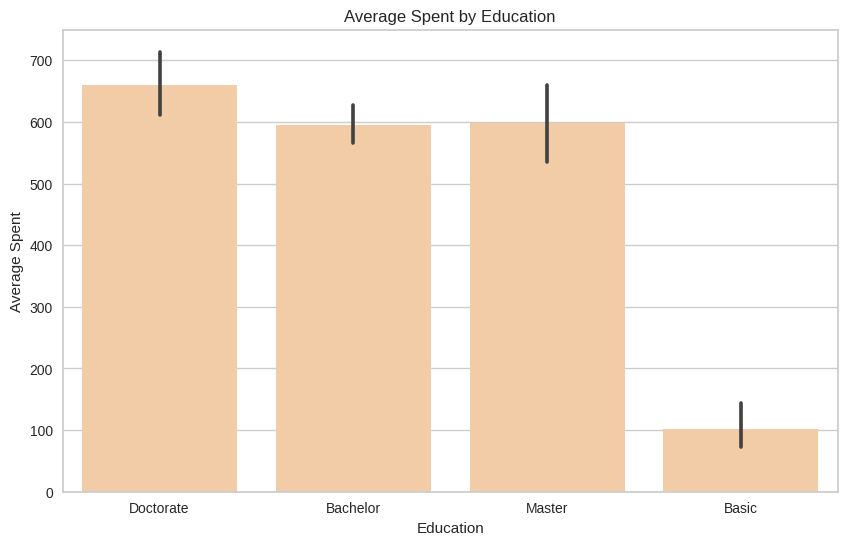

In [748]:
# Create the bar plot for Average Spent by Education
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Total_Spending', data=df_cleaned, color='#FFCC99')
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Show the plot
plt.show()

>Insight:

- People with doctoral degrees spend the most on average. Their spending is significantly higher than that of other groups (above 600). Bachelor and Master, these two categories have similar average spending levels. Individuals with basic education spend the least (below 100)

- Education level may influence spending behavior. As educational attainment increases, so does average spending.


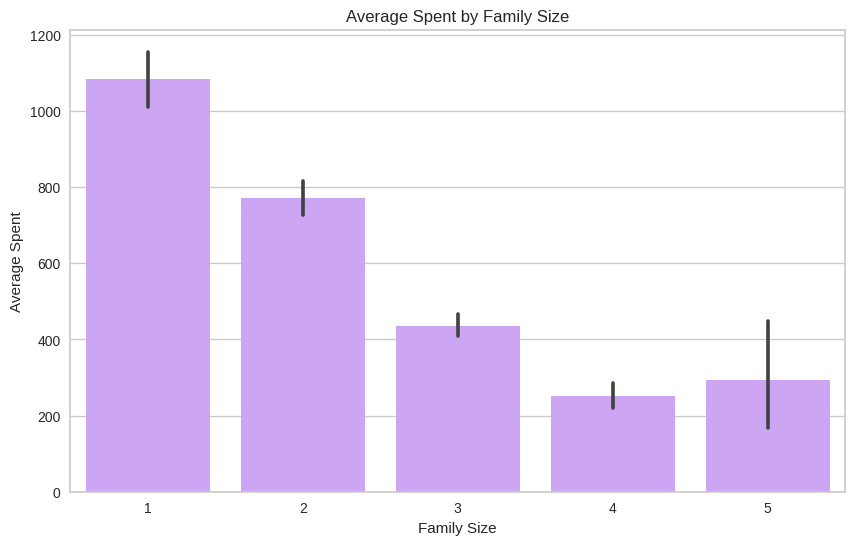

In [749]:
# Create the bar plot for Average Spent by Family Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_Size', y='Total_Spending', data=df_cleaned, palette=['#CC99FF']*len(df_cleaned['Family_Size'].unique()))
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Show the plot
plt.show()

> Insight:

- Larger families (with more members) usually tend to spend less on average compared to smaller families.

- The highest average spending is observed for single-person households (Family Size 1)

- The graph suggests that larger families do not necessarily spend proportionally more.

### Percentage of Customer Accepted Promotion Plan







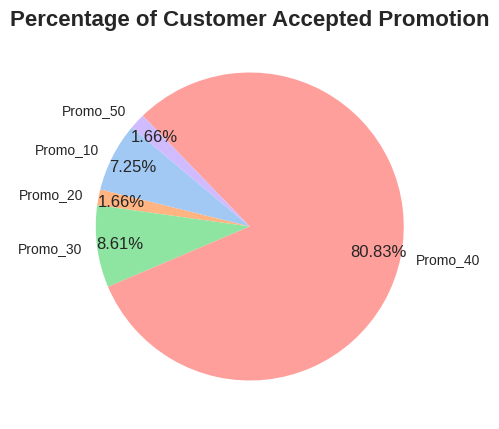

In [750]:
# Calculate the percentage of each Promo column
promo_cols = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']
percent = df_cleaned[promo_cols].sum() * 100 / len(df)

# Create a pie chart
plt.figure(figsize=(5,5))
plt.title('Percentage of Customer Accepted Promotion', weight='bold', fontsize=16)

# Draw the pie chart
plt.pie(percent, labels=percent.index, autopct='%1.2f%%', startangle=140,
        labeldistance=1.1, pctdistance=0.85)

# Display the pie chart
plt.show()


>Insight:
- The marketing campaigns had a rather low acceptance rate, with only the fourth campaign achieving a high rate of up to 81.03%.
- Promo_40 seems to be the most effective promotion, capturing the majority of customer interest.
- Promo_30 and Promo_10 also contribute to customer acceptance but to a lesser extent.
- Promo_50 and Promo_20 may need adjustments or further analysis to improve their effectiveness.



In [751]:
group = pd.cut(df_cleaned['Age'], [20, 30, 40, 50])
group.value_counts()

Age
(30, 40]    1610
(40, 50]     452
(20, 30]     303
Name: count, dtype: int64

>Insight
- All products were mainly purchased by people in the 30-40 age group, except for `Candy` and `Jewellery`.
- `Liquor` was the most purchased product, followed by `Pork` and `Jewellery`. For `Liquor` products alone, the revenue reached over 700 thousand dollars in 2 years. This accounts for 50.63% of the company's income.



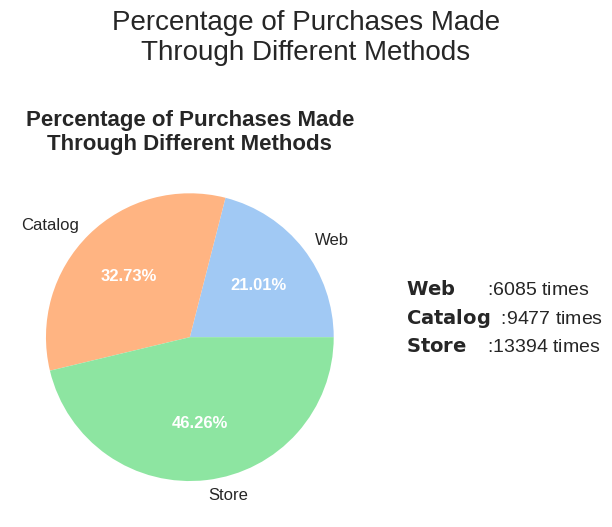

In [752]:
# Define the mosaic layout with only one plot area for the pie chart
fig, axd = plt.subplot_mosaic([[0], [0], [0]], constrained_layout=True, figsize=(6,6))

fig.suptitle("Percentage of Purchases Made\nThrough Different Methods", fontsize=20)

# Pie chart data
label = ['Web', 'Catalog', 'Store']
data = df_cleaned[['Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases']].sum().sort_values()

# Create the pie chart
wedges, texts, autotexts = axd[0].pie(
    x=data, labels=label, autopct='%.2f%%', textprops=dict(fontsize=12)
)
axd[0].set_title('Percentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=16)

# Customize the pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Add the text outside the pie chart
for i, (name, value) in enumerate(zip(label, data)):
    axd[0].text(1.5, 0.3 - 0.2 * i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

plt.show()

> Insight

- Purchases across all three platforms did not show significant differences
between age groups.

- The majority of purchases were made in-store, accounting for approximately 46.4%, followed by purchases through the catalog at 32.68%, and finally, through the website.

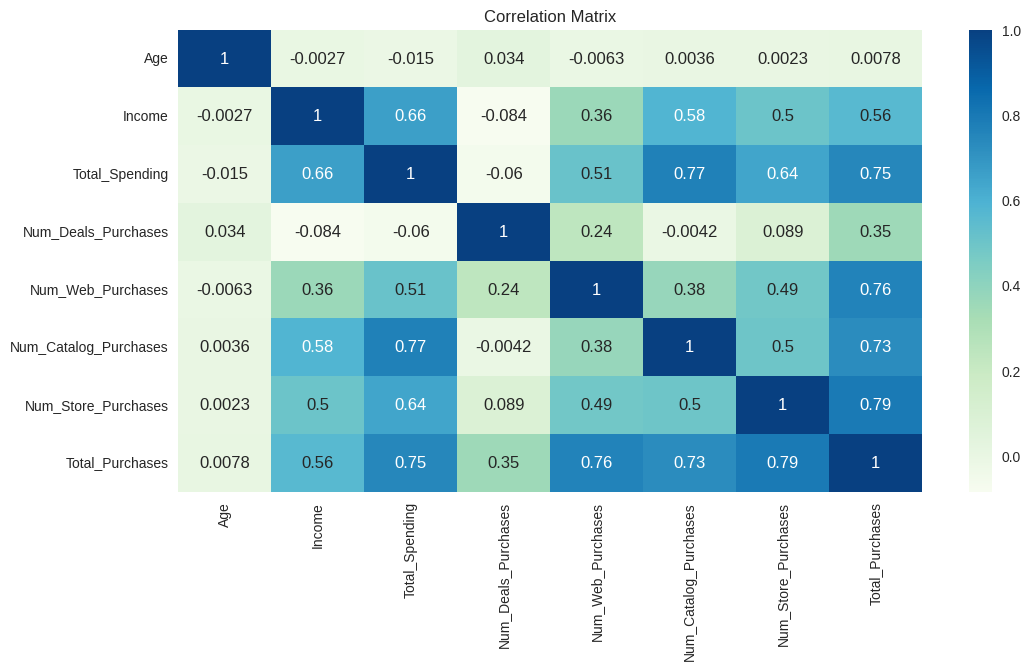

In [753]:
# Show the correlation matrix among numerical variables
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Age', 'Income', 'Total_Spending', 'Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Total_Purchases']].corr(), annot=True, cmap='GnBu')
plt.title('Correlation Matrix')
plt.show()

Insight

- Individuals with higher incomes tend to spend more.

- Customers who spend more tend to make more web-based purchases.

- Customers who make more web purchases also tend to make more catalog purchases.

- Customers who buy from catalogs also tend to make in-store purchases.

- In-store purchases contribute significantly to the overall total purchases.

###**IV/ Suggest Metric**

#####**1. Preprocessing and PCA**

We need to perform feature engineering to prepare the data for machine learning. The steps and reasons for preprocessing data are:

**1.1 Data Normalization**
   - **Standardize Measurement Units**: Ensure that all features have the same units or value ranges, helping machine learning models perform more effectively.
   - **Reduce Bias and Dispersion**: Models converge faster and more accurately when the data is normalized.

**1.2 Categorical Data Processing**
   - **Label Encoding**: Convert categorical values into numerical values so that machine learning models can process them.
   - **One-hot Encoding**: Avoid creating false relationships between categorical values by converting categorical features into binary features
   
**1.3 Dimensionality Reduction**
   - **Reduce Complexity**: Decreasing the number of features helps machine learning models run faster and consume fewer resources.
   - **Prevent Overfitting**: Reducing the number of features helps decrease the risk of the model being too detailed and not generalizing well.
   - **Visualization**: Reducing data dimensions to 2D or 3D helps easily visualize and understand the data structure.


In [754]:
df_old=df_cleaned.copy()
df_cleaned
df_old

,Age,Education,Income,Marital_Status,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
0,42,Doctorate,30396.0,Partner,1,3,16,2,6,0,...,1,1,0,2,1,1,2,6,7,0
2,42,Doctorate,68682.0,Partner,0,2,920,2,505,99,...,0,1,0,1,4,9,10,24,2,0
5,42,Bachelor,44931.0,Partner,1,3,79,2,11,0,...,0,0,0,1,2,1,3,7,5,0
6,30,Bachelor,72679.0,Alone,1,2,620,56,260,127,...,0,1,0,1,4,7,5,17,1,0
7,37,Doctorate,66334.0,Partner,1,3,910,13,218,0,...,0,1,0,2,9,3,5,19,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,38,Bachelor,92955.0,Partner,0,2,694,23,925,31,...,0,0,0,1,6,7,9,23,2,0
3064,34,Basic,20425.0,Partner,1,3,5,14,5,3,...,0,1,0,2,2,0,3,7,7,0
3065,34,Doctorate,65295.0,Alone,0,1,366,34,117,34,...,0,1,0,1,3,3,13,20,2,0
3066,26,Bachelor,31632.0,Alone,0,1,18,10,12,11,...,0,1,0,1,2,1,2,6,7,0


In [755]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50', 'Complain']
df = df_cleaned.drop(cols_del, axis=1)

In [756]:
# Creating a dictionary for manual label encoding
education_mapping = {
    "Doctorate": 0,
    "Master": 1,
    "Bachelor": 2,
    "Basic":0
}
# Apply the mapping to the 'Education' column
df_cleaned['Education'] = df_cleaned['Education'].map(education_mapping)


In [757]:
# Creating a dictionary for manual label encoding
df_cleaned['Marital_Status'] = df_cleaned['Marital_Status'].map({'Partner': 1, 'Alone': 0})

In [758]:
df_cleaned

,Age,Education,Income,Marital_Status,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
0,42,0,30396.0,1,1,3,16,2,6,0,...,1,1,0,2,1,1,2,6,7,0
2,42,0,68682.0,1,0,2,920,2,505,99,...,0,1,0,1,4,9,10,24,2,0
5,42,2,44931.0,1,1,3,79,2,11,0,...,0,0,0,1,2,1,3,7,5,0
6,30,2,72679.0,0,1,2,620,56,260,127,...,0,1,0,1,4,7,5,17,1,0
7,37,0,66334.0,1,1,3,910,13,218,0,...,0,1,0,2,9,3,5,19,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,38,2,92955.0,1,0,2,694,23,925,31,...,0,0,0,1,6,7,9,23,2,0
3064,34,0,20425.0,1,1,3,5,14,5,3,...,0,1,0,2,2,0,3,7,7,0
3065,34,0,65295.0,0,0,1,366,34,117,34,...,0,1,0,1,3,3,13,20,2,0
3066,26,2,31632.0,0,0,1,18,10,12,11,...,0,1,0,1,2,1,2,6,7,0


In [759]:
scaler = StandardScaler()
scaler.fit(df_cleaned)
scaled_df = pd.DataFrame(scaler.transform(df_cleaned),columns= df_cleaned.columns)
print("All features are now scaled")
scaled_df.head(5)

All features are now scaled


,Age,Education,Income,Marital_Status,Children,Family_Size,Liquor,Vegetables,Pork,Seafood,...,Promo_30,Promo_40,Promo_50,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Total_Purchases,Num_Web_Visits_Month,Complain
0,1.231002,-1.592689,-1.025468,0.746288,0.067971,0.453867,-0.864514,-0.655000,-0.726182,-0.682366,...,3.581956,0.687461,-0.118958,-0.137444,-1.073264,-0.564279,-1.100362,-1.142178,0.715226,-0.092351
1,1.231002,-1.592689,0.826929,0.746288,-1.271621,-0.657308,1.862499,-0.655000,1.620882,1.150862,...,-0.279177,0.687461,-0.118958,-0.670322,-0.002565,2.305657,1.302552,1.212424,-1.244809,-0.092351
2,1.231002,0.771849,-0.322219,0.746288,0.067971,0.453867,-0.674467,-0.655000,-0.702665,-0.682366,...,-0.279177,-1.454628,-0.118958,-0.670322,-0.716365,-0.564279,-0.799998,-1.011367,-0.068788,-0.092351
3,-1.293628,0.771849,1.020317,-1.339966,0.067971,-0.657308,0.957517,0.718090,0.468516,1.669351,...,-0.279177,0.687461,-0.118958,-0.670322,-0.002565,1.588173,-0.199269,0.296745,-1.636815,-0.092351
4,0.179073,-1.592689,0.713325,0.746288,0.067971,0.453867,1.832333,-0.375296,0.270967,-0.682366,...,-0.279177,0.687461,-0.118958,-0.137444,1.781933,0.153205,-0.199269,0.558368,-0.068788,-0.092351


In [760]:
pca = PCA(n_components=3)

pca.fit(scaled_df)

# Transforming the Data and Creating a DataFrame:
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2","col3"]))

# Descriptive statistics
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2365.0,5.708377e-17,2.827840,-5.120063,-2.553398,-0.728872,2.372117,7.864592
col2,2365.0,4.807054e-17,1.521167,-3.774678,-1.081073,-0.201748,0.927631,6.598525
col3,2365.0,-7.511023e-17,1.441094,-1.789940,-0.387098,-0.088731,0.116869,12.449370


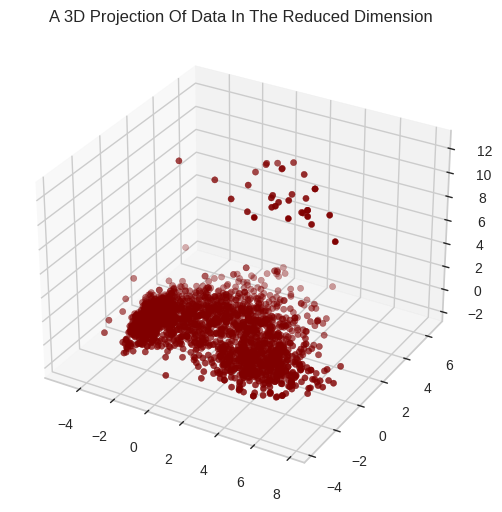

In [761]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Based on the 3D plot of the data, we observe that some data points have heights higher or lower than the average height value. This suggests significant variability or dispersion in the data along the height dimension, which may affect the clustering process.

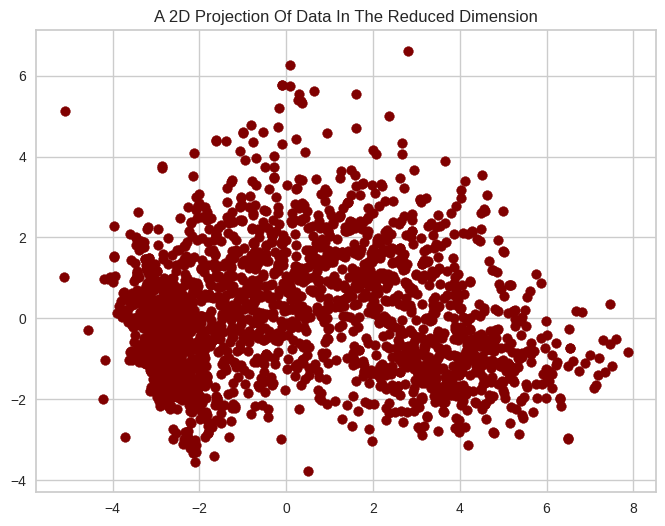

In [762]:
# Initialize a PCA object with 2 components
pca = PCA(n_components=2)
# Fit the PCA model to the scaled data
pca.fit(scaled_df)
# Transform the data and create a new DataFrame
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2"])
x = PCA_df["col1"]
y = PCA_df["col2"]
# Plot the 2D projection of the data in the reduced dimension space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(x, y, c="maroon", marker="o")
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

To better illustrate the number of clusters in the data, we reduced the data to 2 dimensions, and then observed that the data appeared to be divided into 3 clusters, so the group decided to use k=3.

###**2. Clustering**

**K-means clustering**

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a predetermined number of clusters. The goal of k-means clustering is to group similar data points together and discover patterns or structures within the data.

Here's how the k-means algorithm works:

- Initialization: Choose the number of clusters (
𝑘
k) and randomly initialize
𝑘
k cluster centroids (points representing the center of each cluster).

- Assignment: Assign each data point to the nearest cluster centroid based on a distance metric, typically Euclidean distance.

- Update centroids: Recalculate the centroid of each cluster by taking the mean of all data points assigned to that cluster.

- Repeat: Iterate steps 2 and 3 until the centroids no longer change significantly or a maximum number of iterations is reached.

- Convergence: Once the algorithm converges, the final clusters are formed, and each data point is assigned to one of the clusters.

In [764]:
# Set number of cluster to 3
model = KMeans(n_clusters=3, random_state=100)
# fit model and predict clusters
yhat_AC = model.fit_predict(PCA_df)
PCA_df['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_cleaned['Clusters'] = yhat_AC
df_old['Clusters'] = yhat_AC

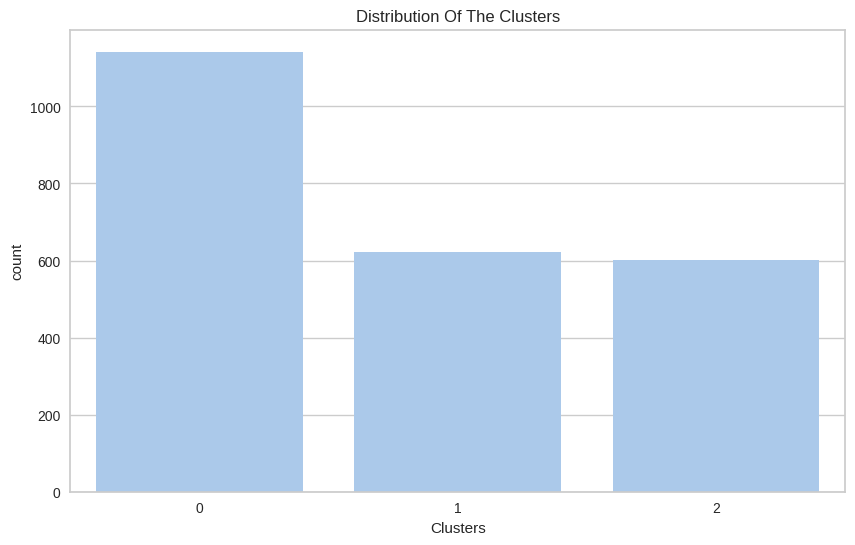

In [765]:
# Create a new figure with a specified size
plt.figure(figsize=(10,6))
# Plot the distribution of clusters using a countplot
pl = sns.countplot(x=df_old['Clusters'])
# Set the title of the plot
pl.set_title('Distribution Of The Clusters')
# Display the plot
plt.show()

After running the K-means algorithm through the library, we obtain 3 clusters as above, where cluster 0 has the highest number of instances.

#####**2. Customer Profiling**


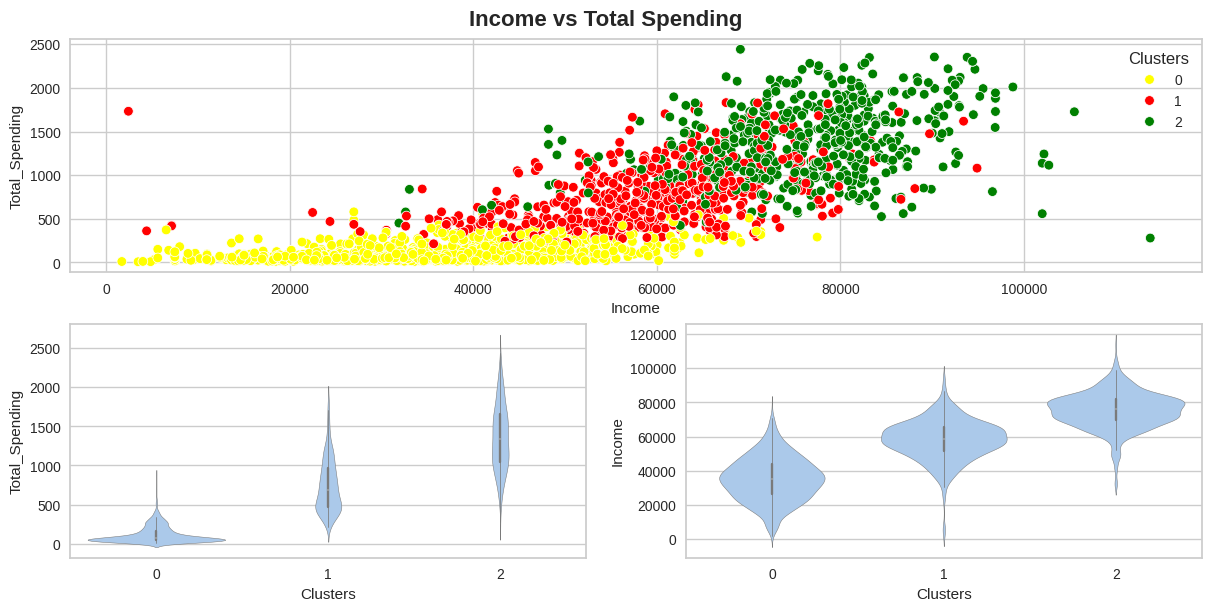

In [766]:
# Initialize a subplot grid layout with specific arrangement
fig, axd = plt.subplot_mosaic([['scatter', 'scatter'], ['violin1', 'violin2']], constrained_layout=True, figsize=(12,6))
# Set the main title of the figure
fig.suptitle('Income vs Total Spending', weight='bold', fontsize=16)
# Plot scatter plot for 'Income' vs 'Total Spending' with hue based on 'Clusters'
sns.scatterplot(data=df_old, x='Income', y='Total_Spending', hue='Clusters', palette=['yellow', 'red', 'green', 'blue'], ax=axd['scatter'])
# Plot violin plot for 'Total Spending' by 'Clusters'
sns.violinplot(data=df_old, x='Clusters', y='Total_Spending', ax=axd['violin1'])
# Plot violin plot for 'Income' by 'Clusters'
sns.violinplot(data=df_old, x='Clusters', y='Income', ax=axd['violin2'])
# Display the plots
plt.show()

From those graphs, we can deduce that:
- Cluster 0: These are customers with low income and low spending.
- Cluster 1: These are customers with moderate income and moderate spending.
- Cluster 2: These are customers with high income and high spending.




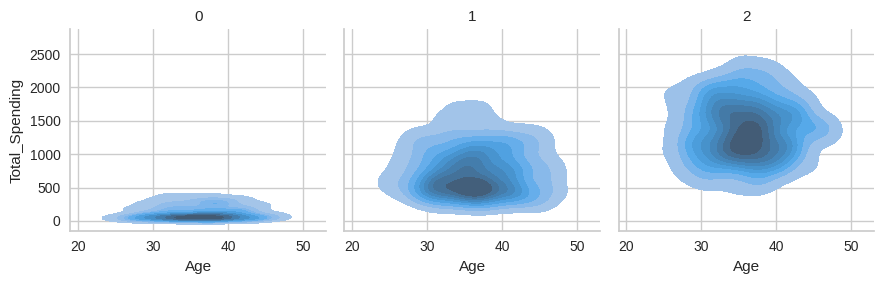

In [767]:
# Using the 'Clusters' column directly
g = sns.FacetGrid(data=df_old, col='Clusters')
# Map KDE plot for 'Age' vs 'Total Spending' with fill
g.map(sns.kdeplot, 'Age', 'Total_Spending', fill=True)
# Add titles for each plot
g.set_titles(col_template="{col_name}")
# Display the plot
plt.show()

Cluster 0: Spans all ages

Cluster 1: Concentrated in the age range of 30-40

Cluster 2: Concentrated in the age range of 30-40

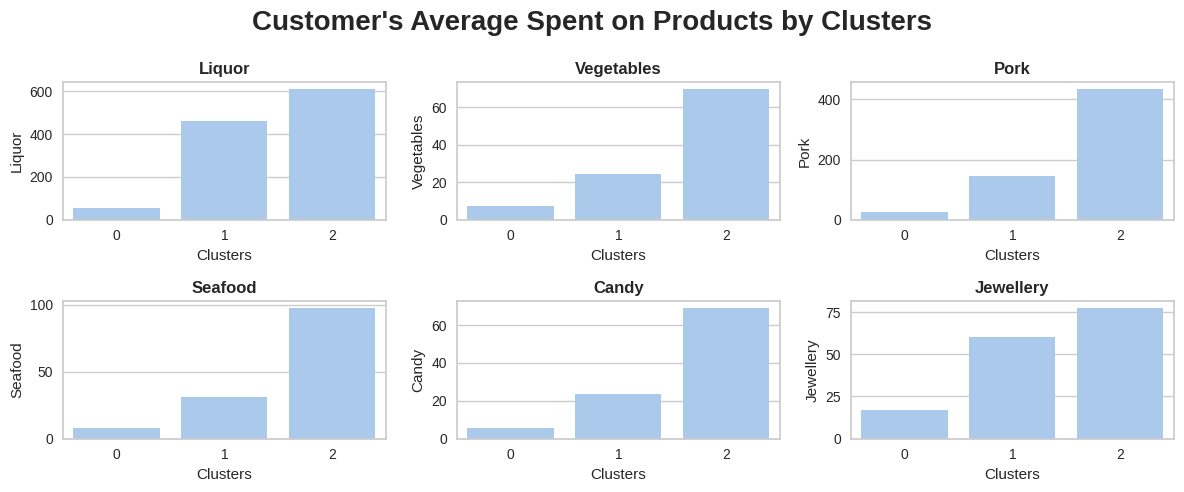

In [768]:
# Create a grid of subplots with 2 rows and 3 columns, and specify the figure size
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
# Set the main title of the figure
fig.suptitle("Customer's Average Spent on Products by Clusters", weight='bold', fontsize=20)
# Flatten the axes array for easier indexing
axes = axes.flatten()
# Plot bar plots for each product category by clusters
sns.barplot(data=df_old, x='Clusters', y='Liquor', ci=None, ax=axes[0])
axes[0].set_title('Liquor', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Vegetables', ci=None, ax=axes[1])
axes[1].set_title('Vegetables', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Pork', ci=None, ax=axes[2])
axes[2].set_title('Pork', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Seafood', ci=None, ax=axes[3])
axes[3].set_title('Seafood', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Candy', ci=None, ax=axes[4])
axes[4].set_title('Candy', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Jewellery', ci=None, ax=axes[5])
axes[5].set_title('Jewellery', weight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()



From those graphs, we can deduce that:
- Cluster 0: This group of customers spends less on all products.
- Cluster 1: This group of customers spends a lot on most products.
- Cluster 2: This group of customers spends a lot primarily on Liquor and Jewellery.

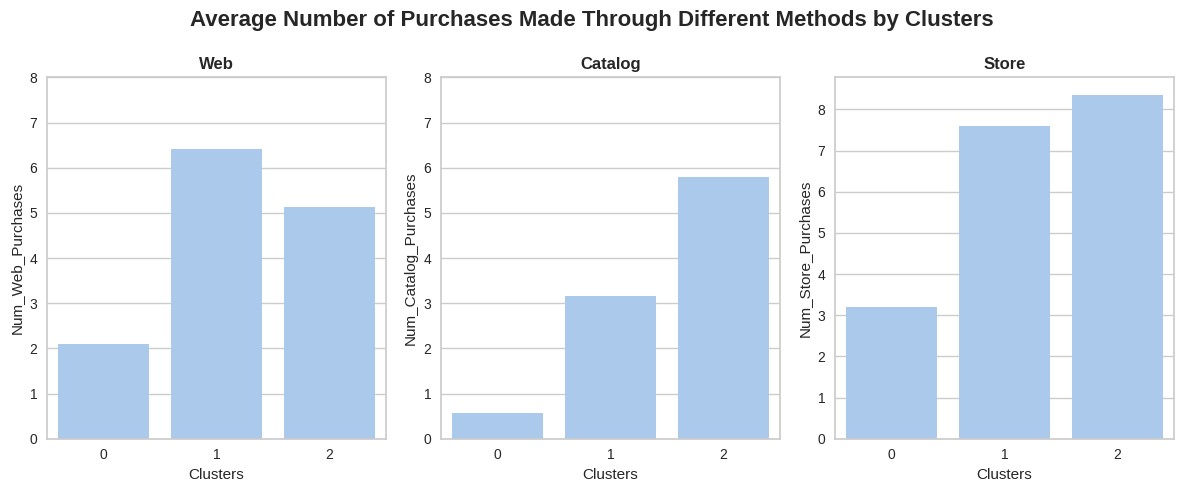

In [769]:
# Create a grid of subplots with 1 row and 3 columns, and specify the figure size
fig, axes = plt.subplots(1, 3, figsize=(12,5))
# Set the main title of the figure
fig.suptitle("Average Number of Purchases Made Through Different Methods by Clusters", weight='bold', fontsize=16)
# Flatten the axes array for easier indexing
axes = axes.flatten()
# Set custom y-axis limits for the first two subplots
custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)
# Plot bar plots for each purchase method by clusters
sns.barplot(data=df_old, x='Clusters', y='Num_Web_Purchases', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Num_Catalog_Purchases', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=df_old, x='Clusters', y='Num_Store_Purchases', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')
# Adjust layout to prevent overlapping
plt.tight_layout()


In [770]:
# Count the distribution of categorical features for each cluster
education_distribution = df_old.groupby(['Clusters', 'Education']).size().unstack(fill_value=0)
marital_status_distribution = df_old.groupby(['Clusters', 'Marital_Status']).size().unstack(fill_value=0)

In [771]:
education_distribution

Education,Bachelor,Basic,Doctorate,Master
Clusters,,,,
0,681,57,217,187
1,324,2,178,118
2,394,0,124,83


From the table, we can deduce that:
- Cluster 0: Mainly consists of individuals with basic education and bachelor's degrees.
- Cluster 1: Mainly consists of customers with college degrees and higher education.
- Cluster 2: Mainly consists of customers with college degrees and higher education.

In [772]:
marital_status_distribution

Marital_Status,Alone,Partner
Clusters,,
0,421,721
1,172,450
2,253,348


From the table, we can deduce that:
- Cluster 0: Mainly single pêo
- Cluster 1: Mixed between single people and people with family.
- Cluster 2: Mainly people who have a family.

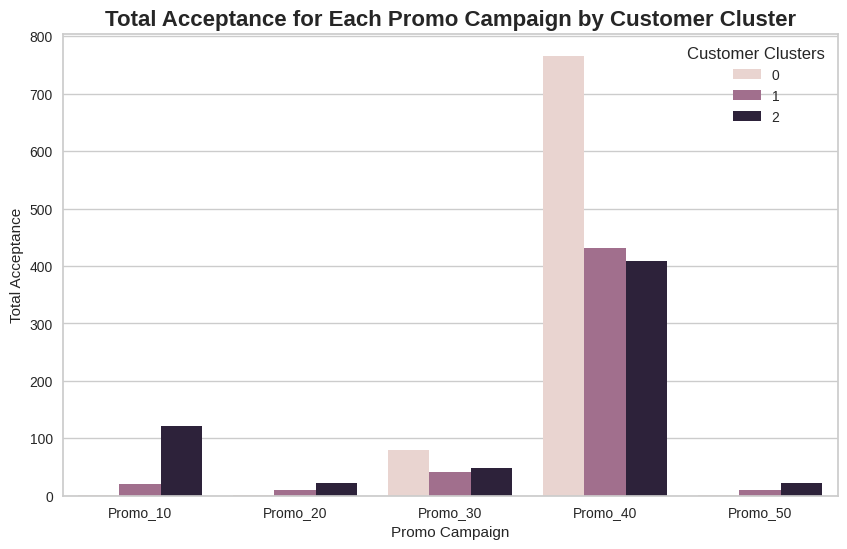

In [773]:
# Group the data by clusters and calculate the total acceptance for each promo campaign
promo_acceptance_clusters = df_old.groupby('Clusters')[['Promo_10', 'Promo_20', 'Promo_30', 'Promo_40', 'Promo_50']].sum().reset_index()

# Convert the data from wide to long format for easier plotting
promo_acceptance_clusters_long = promo_acceptance_clusters.melt(id_vars='Clusters',
                                                                var_name='Promo',
                                                                value_name='Acceptance')

# Plot a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_acceptance_clusters_long, x='Promo', y='Acceptance', hue='Clusters')
plt.title('Total Acceptance for Each Promo Campaign by Customer Cluster', weight='bold', fontsize=16)
plt.xlabel('Promo Campaign')
plt.ylabel('Total Acceptance')
plt.legend(title='Customer Clusters')
plt.show()

From those graphs, we can deduce that:
`Cluster 0` is the group that utilizes promotions the most.

<Figure size 1300x800 with 0 Axes>

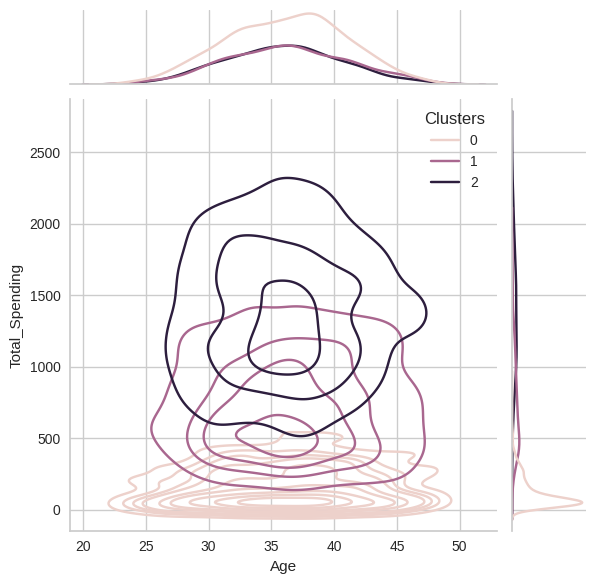

<Figure size 1300x800 with 0 Axes>

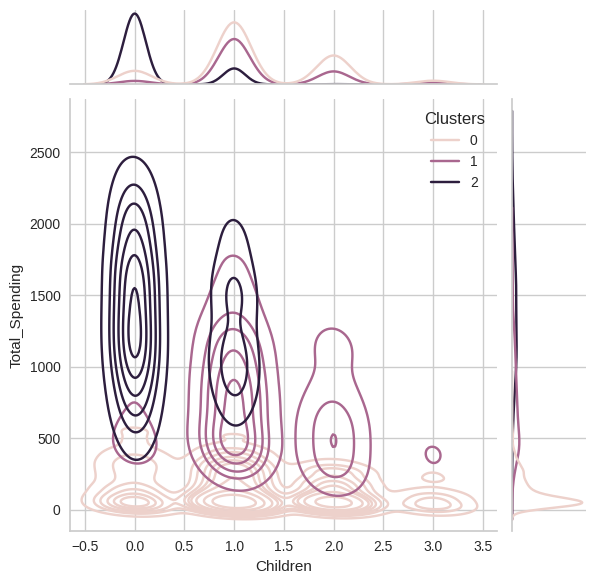

<Figure size 1300x800 with 0 Axes>

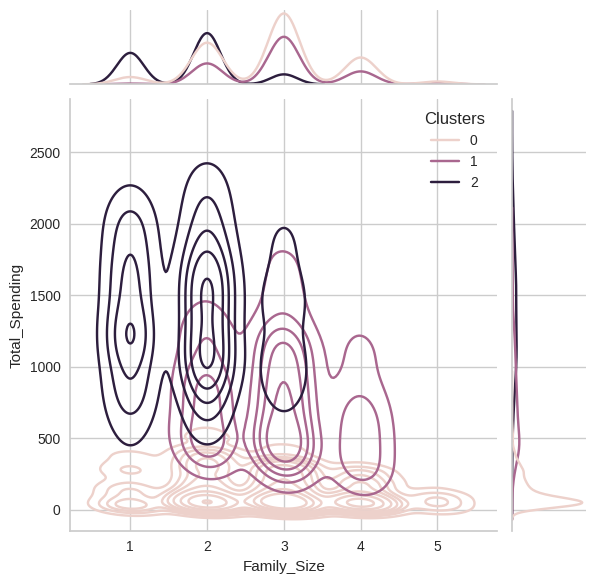

<Figure size 1300x800 with 0 Axes>

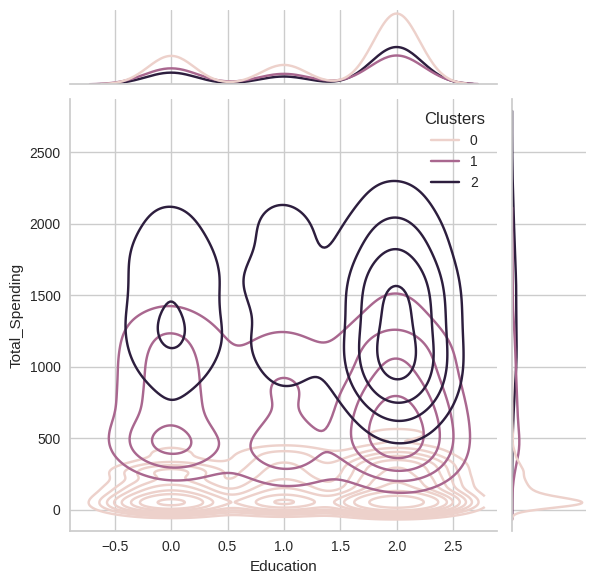

<Figure size 1300x800 with 0 Axes>

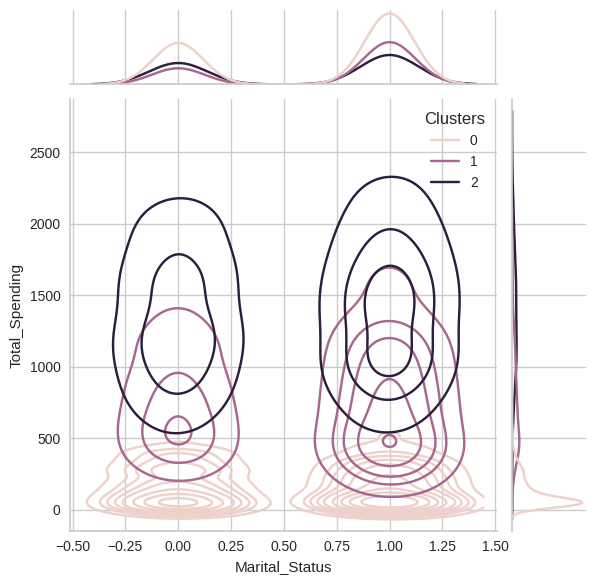

In [774]:
# List of personal attributes to analyze
Personal = ['Age', 'Children', 'Family_Size', 'Education', 'Marital_Status']
# Loop through each personal attribute
for i in Personal:
    # Create a new figure with specified size
    plt.figure(figsize=(13, 8))
    # Plot a joint plot with KDE (kernel density estimate) to analyze the relationship between the personal attribute and 'Total_Spending', colored by clusters
    sns.jointplot(x=df_cleaned[i], y=df_cleaned['Total_Spending'], hue=df_cleaned['Clusters'], kind='kde')


About cluster 0:
- Income & Demographics: Low average income and low spending, mainly with basic and university education, mixed between single and families, with families accounting for a larger number. Stretch all ages.
- Family Structure: Mostly no children or 1 child, maximum 3 children.
- Engagement: High interaction with promotional campaigns
- Purchasing Preferences: Prioritize discounted products.


About cluster 1:
- Income & Demographics: Average income and average spending, mainly graduates and highly educated, mixed between singles and families. The majority age is between 30 and 40.
- Family Structure: Mostly no children or 1 child.
- Engagement: Interact with medium-level promotional campaigns.
- Purchasing Preferences: Spending a lot on all products.


About Cluster 2:
- Income & Demographics: High income and high spending, mainly graduates and highly educated, mainly married people. The majority age is between 30 and 40.
- Family Structure: Mainly 1 to 2 children.
- Engagement: Interact with medium-level promotional campaigns.
- Purchasing Preferences: Spending a lot on Liquor and Jewellery products.
